## Homework 1: Part I: Regression Modeling with the Prostate Cancer Data ## 

In [3]:
# Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

In [4]:
df = pd.read_csv("./prostate.csv")
df['train'] = df['train'].map({'T': True, 'F': False})

print(f"Dimensions: {df.shape}")
print(f"Columns: {list(df.columns)}\n")
df.info()
df.isna().sum()
df.describe()

Dimensions: (97, 11)
Columns: ['id', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'lpsa', 'train']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       97 non-null     int64  
 1   lcavol   97 non-null     float64
 2   lweight  97 non-null     float64
 3   age      97 non-null     int64  
 4   lbph     97 non-null     float64
 5   svi      97 non-null     int64  
 6   lcp      97 non-null     float64
 7   gleason  97 non-null     int64  
 8   pgg45    97 non-null     int64  
 9   lpsa     97 non-null     float64
 10  train    97 non-null     bool   
dtypes: bool(1), float64(5), int64(5)
memory usage: 7.8 KB


,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,28.145456,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,1.000000,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,25.000000,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,49.000000,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,73.000000,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,97.000000,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [5]:
train_df = df[df["train"]]
test_df  = df[~df["train"]]
print(f"Train rows: {train_df.shape[0]}")
print(f"Test rows: {test_df.shape[0]}")
print(f"Total size: {len(df)}")

Train rows: 67
Test rows: 30
Total size: 97


In [6]:
os.makedirs("./images/", exist_ok=True)

# Plot the distribution of the response variable
response_var = 'lpsa'  # Replace with the actual response variable name if different
sns.histplot(df[response_var], kde=True)
plt.title(f'Distribution of {response_var}')
plt.xlabel(response_var)
plt.ylabel('Frequency')
plt.savefig(f"./images/dist_lpsa.png")
plt.close()

# Plot distributions for four predictors
predictors = ['lcavol', 'lweight', 'age', 'lbph']  # Replace with actual predictor names if different
for predictor in predictors:
    sns.histplot(df[predictor], kde=True)
    plt.title(f'Distribution of {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Frequency')
    plt.savefig(f"./images/dist_{predictor}.png")
    plt.close()

In [7]:
# Visualize how lpsa relates to predictors
response_var = 'lpsa'  # Replace with the actual response variable name if different
predictors = ['lcavol', 'lweight', 'age', 'lbph']  # Replace with actual predictor names if different

# Scatter plots for each predictor vs response variable
for predictor in predictors:
    sns.scatterplot(x=df[predictor], y=df[response_var])
    plt.title(f'{response_var} vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel(response_var)
    plt.savefig(f"./images/scatter_{response_var}_vs_{predictor}.png")
    plt.close()

# Pairplot for a combined view
sns.pairplot(df, vars=[response_var] + predictors, kind='scatter', diag_kind='kde')
plt.savefig(f"./images/pairplot_lpsa_predictors.png")
plt.close()

In [8]:
X_train = sm.add_constant(train_df["lcavol"])  # adds intercept
y_train = train_df["lpsa"]

slr = sm.OLS(y_train, X_train).fit()
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     75.55
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           1.73e-12
Time:                        17:09:43   Log-Likelihood:                -81.382
No. Observations:                  67   AIC:                             166.8
Df Residuals:                      65   BIC:                             171.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5163      0.148     10.264      0.0

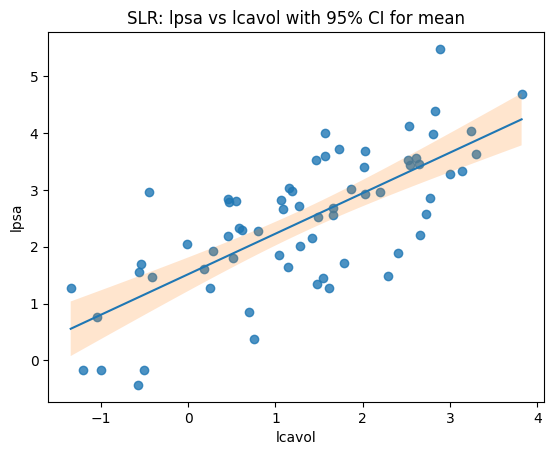

In [9]:
# Grid of x values across the training range
x_grid = np.linspace(train_df["lcavol"].min(), train_df["lcavol"].max(), 200)
X_grid = sm.add_constant(x_grid)

pred = slr.get_prediction(X_grid).summary_frame(alpha=0.05)
# pred contains: mean, mean_ci_lower, mean_ci_upper, obs_ci_lower, obs_ci_upper

plt.scatter(train_df["lcavol"], train_df["lpsa"], alpha=0.8)
plt.plot(x_grid, pred["mean"])
plt.fill_between(x_grid, pred["mean_ci_lower"], pred["mean_ci_upper"], alpha=0.2)
plt.xlabel("lcavol")
plt.ylabel("lpsa")
plt.title("SLR: lpsa vs lcavol with 95% CI for mean")
plt.show()

In [10]:
from sklearn.metrics import root_mean_squared_error, r2_score

X_test = sm.add_constant(test_df["lcavol"])
y_test = test_df["lpsa"]

yhat_test = slr.predict(X_test)

rmse_test_slr = root_mean_squared_error(y_test, yhat_test)
r2_test_slr = r2_score(y_test, yhat_test)

rmse_test_slr, r2_test_slr

(0.6926317344569389, 0.5429507087528963)

In [11]:
response = "lpsa"
predictors = ["lcavol", "lweight", "age", "lbph", "svi", "lcp", "gleason", "pgg45"]

missing_cols = [c for c in [response, "train"] + predictors if c not in df.columns]
if missing_cols: 
    raise ValueError(f"Missing required columns: {missing_cols}")

X_train = sm.add_constant(train_df[predictors])
y_train = train_df[response] 
mlr = sm.OLS(y_train, X_train).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           2.04e-12
Time:                        17:09:49   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4292      1.554      0.276      0.7

In [12]:
coef_table = pd.DataFrame({"coef": mlr.params, "std_err": mlr.bse})
ci = mlr.conf_int(alpha=0.05)
ci.columns = ["ci_2.5%", "ci_97.5%"]
coef_table = coef_table.join(ci)

# Optional: nicer ordering
coef_table = coef_table.loc[["const"] + predictors]

print("\n=== Coefficients / SE / 95% CI ===")
print(coef_table)

# Save to CSV for easy inclusion in report
coef_table.to_csv("./mlr_coef_table.csv", index=True)

yhat_train = mlr.predict(X_train)
rmse_train = root_mean_squared_error(y_train, yhat_train)
r2_train = r2_score(y_train, yhat_train)

# Test predictions
X_test = sm.add_constant(test_df[predictors])
y_test = test_df[response]
yhat_test = mlr.predict(X_test)
rmse_test = root_mean_squared_error(y_test, yhat_test)
r2_test = r2_score(y_test, yhat_test)

print("\n=== Performance ===")
print(f"Train RMSE: {rmse_train:.4f}, Train R^2: {r2_train:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}, Test  R^2: {r2_test:.4f}")

print("\n=== Comparison vs SLR (test) ===")
print(f"SLR Test RMSE: {rmse_test_slr:.4f}, SLR Test R^2: {r2_test_slr:.4f}")
print(f"MLR Test RMSE: {rmse_test_slr:.4f}, MLR Test R^2: {rmse_test_slr:.4f}")


=== Coefficients / SE / 95% CI ===
             coef   std_err   ci_2.5%  ci_97.5%
const    0.429170  1.553588 -2.680674  3.539015
lcavol   0.576543  0.107438  0.361483  0.791604
lweight  0.614020  0.223216  0.167205  1.060835
age     -0.019001  0.013612 -0.046248  0.008246
lbph     0.144848  0.070457  0.003814  0.285882
svi      0.737209  0.298555  0.139586  1.334832
lcp     -0.206324  0.110516 -0.427547  0.014898
gleason -0.029503  0.201136 -0.432121  0.373115
pgg45    0.009465  0.005447 -0.001437  0.020368

=== Performance ===
Train RMSE: 0.6627, Train R^2: 0.6944
Test  RMSE: 0.7220, Test  R^2: 0.5034

=== Comparison vs SLR (test) ===
SLR Test RMSE: 0.6926, SLR Test R^2: 0.5430
MLR Test RMSE: 0.6926, MLR Test R^2: 0.6926


In [13]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Fitted values and residuals (training)
y_train = train_df[response]
yhat_train = mlr.fittedvalues
resid = mlr.resid  # y_train - yhat_train

# Influence diagnostics
influence = mlr.get_influence()
hat = influence.hat_matrix_diag                  # leverage
cooks = influence.cooks_distance[0]              # Cook's distance (array)
std_resid = influence.resid_studentized_internal # standardized residuals

plt.figure()
plt.scatter(yhat_train, resid, alpha=0.8)
plt.axhline(0, linewidth=1)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Linearity check)")
plt.savefig("./images/diag_resid_vs_fitted.png", bbox_inches="tight")
plt.close()

key_predictors = ["lcavol", "lweight", "svi", "lbph"]

for p in key_predictors:
    plt.figure()
    plt.scatter(train_df[p], resid, alpha=0.8)
    plt.axhline(0, linewidth=1)
    plt.xlabel(p)
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs {p} (Linearity check)")
    plt.savefig(f"./images/diag_resid_vs_{p}.png", bbox_inches="tight")
    plt.close()

# BP test needs residuals and design matrix
X_train = mlr.model.exog  # the actual matrix used in the fit (includes intercept)
bp_stat, bp_pvalue, f_stat, f_pvalue = het_breuschpagan(resid, X_train)

print("Breusch–Pagan test:")
print(f"  LM stat: {bp_stat:.4f}, p-value: {bp_pvalue:.4g}")
print(f"  F stat : {f_stat:.4f}, p-value: {f_pvalue:.4g}")

fig = sm.qqplot(resid, line="45", fit=True)
plt.title("QQ Plot of Residuals")
plt.savefig("./images/diag_qqplot_resid.png", bbox_inches="tight")
plt.close()

plt.figure(figsize=(10, 4))
plt.stem(np.arange(len(cooks)), cooks, markerfmt=",", basefmt=" ")
plt.xlabel("Observation (training index order)")
plt.ylabel("Cook's distance")
plt.title("Cook's Distance (Influence)")
plt.savefig("./images/diag_cooks_distance.png", bbox_inches="tight")
plt.close()

plt.figure()
plt.scatter(hat, std_resid, alpha=0.8)
plt.axhline(0, linewidth=1)
plt.xlabel("Leverage (hat values)")
plt.ylabel("Standardized residuals")
plt.title("Leverage vs Standardized Residuals")
plt.savefig("./images/diag_leverage_vs_stdresid.png", bbox_inches="tight")
plt.close()

top3_pos = np.argsort(cooks)[-3:][::-1]  # positions in the training data order
top3_idx = train_df.index[top3_pos]      # original dataframe indices

top3_table = train_df.loc[top3_idx, predictors + [response]].copy()
top3_table["cooks_distance"] = cooks[top3_pos]
top3_table["leverage"] = hat[top3_pos]
top3_table["std_resid"] = std_resid[top3_pos]

print("Top 3 influential observations (by Cook's distance):")
print(top3_table)

top3_table.to_csv("./top3_influential_points.csv", index=True)

Breusch–Pagan test:
  LM stat: 4.3852, p-value: 0.8208
  F stat : 0.5077, p-value: 0.8457
Top 3 influential observations (by Cook's distance):
      lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45  \
46  2.727853  3.995445   79  1.879465    1  2.656757        9    100   
68 -0.446287  4.408547   69 -1.386294    0 -1.386294        6      0   
38  2.660959  4.085136   68  1.373716    1  1.832581        7     35   

        lpsa  cooks_distance  leverage  std_resid  
46  2.568788        0.211817  0.239632  -2.459467  
68  2.962692        0.147887  0.196990   2.329293  
38  2.213754        0.082499  0.109818  -2.453288  
